<a href="https://colab.research.google.com/github/ZebraHead22/PolyPhotonics2021/blob/main/3rd_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIFAR-10 is a classical benchmark problem in image recognition. Given are 10 categories (airplane, dog, ship, …) and the task is to classify small images of these objects accordingly.

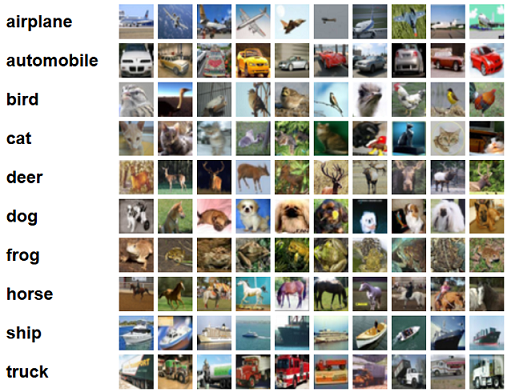
The CIFAR-10 dataset consists of 60000 RGB images of size 32x32. There are 6000 images per class and the dataset is split into 50000 training images and 10000 test images.

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
from matplotlib import pyplot

In [ ]:
# Set seed for repeatable results
np.random.seed(42)
# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Ssummarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(X_train[i])
# show the figure
pyplot.show()

In [ ]:
# Batch Size
batch_size = 32
# Number of images classes
nb_classes = 10
# Number of epochs to train
nb_epoch = 25
# Image size
img_rows, img_cols = 32, 32
# The number of channels in the image: RGB
img_channels = 3

In [ ]:
# Data normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert tags to categories
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classe

In [ ]:
# Create a sequential model
model = Sequential()
# First convolutional layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# Second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# First subsample layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Regularization layer: Dropout
model.add(Dropout(0.25))
# Third convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Fourth convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
# Second subsample layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Regularization layer: Dropout
model.add(Dropout(0.25))
# The layer for converting data from a 2D representation to a flat one
model.add(Flatten())
# Fully connected classification layer
model.add(Dense(512, activation='relu'))
# Regularization layer: Dropout
model.add(Dropout(0.5))
# Output fully connected layer
model.add(Dense(nb_classes, activation='softmax'))

In [ ]:
# Set optimization parameters
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
print(model.summary())

In [ ]:
# Training model
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          validation_split=0.1,
          shuffle=True,
          verbose=2)

In [ ]:
def plotLosses(history):  
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('model loss')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='upper left')
    pyplot.show()

plotLosses(history)

In [ ]:
# We evaluate the quality of network training on test data
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

In [ ]:
# Take an arbitrary index of the test sample
index_example = 11

# Load data
(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()

# Draw an example
pyplot.imshow(Xtest[index_example])
pyplot.show()

In [ ]:
# Data test normalization
Xtest = Xtest.astype('float32')
Xtest /= 255

In [ ]:
# Make a prediction
img = Xtest[index_example]
img = np.expand_dims(img, axis = 0)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
prediction = model.predict(img)
print('Predicted class: ', labels[np.argmax(prediction)])